## Water mass transformation code
From Elizabeth Maroon

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pop_tools
from datetime import timedelta
import glob

In [3]:
#choose cases and data paths
case1 = 'b.e21.B1850.f09_g17.CMIP6-piControl.001b'
case2 = 'b.e21.B1850.f09_g17.CMIP6-piControl.001_bl99b'
label1 = 'MUSHY'
label2 = 'BL99'

data_dir1 = '/glade/campaign/cgd/ppc/dbailey/'+case1+'/ocn/proc/tseries/month_1/'
data_dir2 = '/glade/campaign/cgd/ppc/dbailey/'+case2+'/ocn/proc/tseries/month_1/'
varsneeded = ['SALT', 'TEMP', 'SHF', 'SFWF']

# FOR TOTAL FRESH WATER BUDGET, NEED THESE TERMS. DOUBLE CHECK...
#varsneeded = ['SALT', 'TEMP', 'SHF', 'SFWF','EVAP_F','ROFF_F','IOFF_F','SNOW_F','PREC_F','MELT_F','SALT_F']
# Look in pop code: forcing_coupled.f90
# EVAP_F + PREC_F + MELT_F + ROFF_F + IOFF_F + SALT_F

In [7]:
#reading in files - case 1
ds1 = []
ds2 = []
for varname in varsneeded:
    # This loop takes a long time
    #my_files=sorted(glob.glob(data_dir1+case1+'.pop.h.'+varname+'.*.nc'))[-2:]
    #ds1.append(xr.open_mfdataset(my_files,combine='by_coords',chunks={}))
    #my_files=sorted(glob.glob(data_dir2+case2+'.pop.h.'+varname+'.*.nc'))[-2:]
    #ds2.append(xr.open_mfdataset(my_files,combine='by_coords',chunks={}))
    
    # TEST WITH SINGLE FILE OPENING
    ds1.append(xr.open_dataset(data_dir1+case1+'.pop.h.'+varname+'.092101-097012.nc'))
    ds2.append(xr.open_dataset(data_dir2+case2+'.pop.h.'+varname+'.092101-097012.nc'))
    
ds1=xr.merge(ds1)
ds2=xr.merge(ds2)

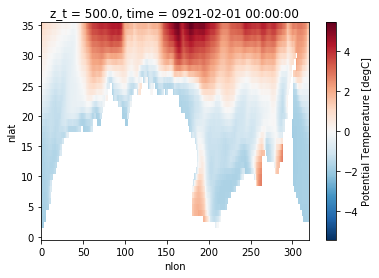

In [8]:
# Southern ocean: Everything 60S - 90S
box = {'nlat':slice(0,36), 'nlon':slice(0,320)}
#pulling only top layer and the region of interest
ds1=ds1.isel(z_t=0).sel(box)
ds2=ds2.isel(z_t=0).sel(box)

#test that masking worked properly
ds1["TEMP"].isel(time=0).plot()

In [9]:
ds1.load()
ds2.load()

<xarray.Dataset>
Dimensions:                 (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 36, nlon: 320, time: 600, transport_comp: 5, transport_reg: 2, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
    z_t                     float32 500.0
  * z_t_150m                (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w                     (z_w) float32 0.0 1000.0 ... 500004.7 525000.94
  * z_w_top                 (z_w_top) float32 0.0 1000.0 ... 500004.7 525000.94
  * z_w_bot                 (z_w_bot) float32 1000.0 2000.0 ... 549999.06
  * lat_aux_grid            (lat_aux_grid) float32 -79.48815 -78.952896 ... 90.0
  * moc_z                   (moc_z) float32 0.0 1000.0 ... 525000.94 549999.06
    ULONG                   (nlat, nlon) float64 321.1 322.3 ... 318.9 320.0
    ULAT                    (nlat, nlon) float64 -78.95 -78.95 ... -60.25 -60.25
    TLONG                   (nlat, nlon) float64 320.6 321.7 ... 318.3 319.4
    TLAT                    (nlat, nlon) float64 -79.22 -79.22 ... -60.52 -60.52
  * time                    (time) object 0921-02-01 00:00:00 ... 0971-01-01 ...
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables:
    moc_components          (moc_comp) |S384 b'Eulerian Mean' ... b'Submeso'
    transport_components    (transport_comp) |S384 b'Total' ... b'Submeso Adv...
    transport_regions       (transport_reg) |S384 b'Global Ocean - Marginal S...
    dz                      float32 1000.0
    dzw                     (z_w) float32 500.0 1000.0 ... 24994.459 24997.176
    KMT                     (nlat, nlon) float64 0.0 0.0 0.0 ... 48.0 48.0 48.0
    KMU                     (nlat, nlon) float64 0.0 0.0 0.0 ... 48.0 47.0 46.0
    REGION_MASK             (nlat, nlon) float64 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0
    UAREA                   (nlat, nlon) float64 1.423e+13 ... 3.686e+13
    TAREA                   (nlat, nlon) float64 1.125e+13 ... 3.656e+13
    HU                      (nlat, nlon) float64 0.0 0.0 ... 2.298e+05 2.075e+05
    HT                      (nlat, nlon) float64 0.0 0.0 ... 2.53e+05 2.53e+05
    DXU                     (nlat, nlon) float64 2.397e+06 ... 6.206e+06
    DYU                     (nlat, nlon) float64 5.94e+06 5.94e+06 ... 5.94e+06
    DXT                     (nlat, nlon) float64 1.894e+06 ... 6.155e+06
    DYT                     (nlat, nlon) float64 5.94e+06 5.94e+06 ... 5.94e+06
    HTN                     (nlat, nlon) float64 2.397e+06 ... 6.206e+06
    HTE                     (nlat, nlon) float64 5.94e+06 5.94e+06 ... 5.94e+06
    HUS                     (nlat, nlon) float64 2.397e+06 ... 6.155e+06
    HUW                     (nlat, nlon) float64 5.94e+06 5.94e+06 ... 5.94e+06
    ANGLE                   (nlat, nlon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ANGLET                  (nlat, nlon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    days_in_norm_year       timedelta64[ns] 365 days
    grav                    float64 980.6
    omega                   float64 7.292e-05
    radius                  float64 6.371e+08
    cp_sw                   float64 3.996e+07
    sound                   float64 1.5e+05
    vonkar                  float64 0.4
    cp_air                  float64 1.005e+03
    rho_air                 float64 1.292
    rho_sw                  float64 1.026
    rho_fw                  float64 1.0
    stefan_boltzmann        float64 5.67e-08
    latent_heat_vapor       float64 2.501e+06
    latent_heat_fusion      float64 3.337e+09
    latent_heat_fusion_mks  float64 3.337e+05
    ocn_ref_salinity        float64 34.7
    sea_ice_salinity        float64 4.0
    T0_Kelvin               float64 273.1
    salt_to_ppt             float64 1e+03
    ppt_to_salt             float64 0.001
    mass_to_Sv              float64 1e-12
    heat_to_PW              float64 4.186e-15
    salt_to_Svppt           float64 1e-09
    salt_to_mmday           float64 3.154e+05
    momentum_factor      

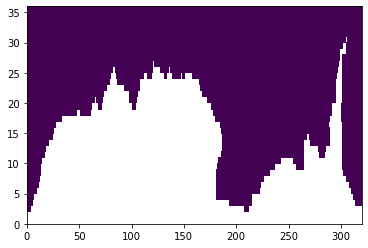

In [10]:
# set some values
s0=ds1['ocn_ref_salinity']
cp=ds1['cp_sw']/1000

# get grid information
tlat=ds1['TLAT']
tlon=ds1['TLONG']
tarea=ds1['TAREA']/(100*100)  # convert to m2
depth=ds1['z_t']
ht=ds1['HT']
depth_top=depth.where(depth<ht, np.nan)/100

# make a quick plot of the area the WMT is done over
plt.pcolormesh(depth_top)

In [11]:
## CASE1
salt1=ds1['SALT']
temp1=ds1['TEMP']

#get stuff from POP EOS
rho1,drhods1,drhodt1=pop_tools.eos(salt=salt1,temp=temp1,return_coefs=True,depth=depth_top)

#construct alpha and beta using POP methods
alpha1=-1*drhodt1/rho1
beta1=drhods1/rho1

#put SHF and FW fluxes into units that can be scaled by alpha and beta
shf_scaled1=ds1['SHF']/cp
fw_scaled1=ds1['SFWF']*(salt1/1000)/(1-salt1/1000)

#multiply by alpha and beta to get density fluxes
heatpart1=-alpha1*shf_scaled1
fwpart1=-1*fw_scaled1*beta1

#combine to get total boundary forced density flux
densflux1=heatpart1+fwpart1

In [12]:
## CASE2
salt2=ds2['SALT']
temp2=ds2['TEMP']

#get stuff from POP EOS
rho2,drhods2,drhodt2=pop_tools.eos(salt=salt2,temp=temp2,return_coefs=True,depth=depth_top)

#construct alpha and beta using POP methods
alpha2=-1*drhodt2/rho2
beta2=drhods2/rho2

#put SHF and FW fluxes into units that can be scaled by alpha and beta
shf_scaled2=ds2['SHF']/cp
fw_scaled2=ds2['SFWF']*(salt2/1000)/(1-salt2/1000)

#multiply by alpha and beta to get density fluxes
heatpart2=-alpha2*shf_scaled2
fwpart2=-1*fw_scaled2*beta2

#combine to get total boundary forced density flux
densflux2=heatpart2+fwpart2

In [13]:
#set up density classes - goes from 1023.0 to 1028.9 in 0.1 interval
binsize = 0.1 #typical value used
dens_class = np.arange(np.floor(rho1.min()),np.ceil(rho1.max()),binsize)

sigma = xr.DataArray(dens_class[0:-1]+binsize/2-1000, dims=['sigma'], coords={'sigma':dens_class[0:-1]+binsize/2-1000})

In [14]:
#calculate the WMT (total)
wmt1=[]
wmt2=[]

for ii in range(len(dens_class[0:-1])):
    # CASE 1
    densf_byclass = densflux1.where((rho1>=dens_class[ii]) & (rho1<dens_class[ii+1]),np.nan)
    wmt1.append((densf_byclass*tarea).sum(['nlat','nlon'])/binsize)
    # CASE 2
    densf_byclass = densflux2.where((rho2>=dens_class[ii]) & (rho2<dens_class[ii+1]),np.nan)
    wmt2.append((densf_byclass*tarea).sum(['nlat','nlon'])/binsize)


# Set sigma as a coordinate in the arrays
wmt1 = xr.concat(wmt1, dim = sigma)
wmt2 = xr.concat(wmt2, dim = sigma)
   
wmf1 = - wmt1.diff('sigma')/binsize
wmf1 = wmf1.assign_coords({'sigma':sigma[0:-1]+binsize/2})
wmf2 = - wmt2.diff('sigma')/binsize
wmf2 = wmf2.assign_coords({'sigma':sigma[0:-1]+binsize/2})

In [15]:
#calculate the WMT (freshwater part only)
wmt1_fresh=[]
wmt2_fresh=[]

for ii in range(len(dens_class[0:-1])):
    # CASE 1
    fw_byclass = fwpart1.where((rho1>=dens_class[ii]) & (rho1<dens_class[ii+1]),np.nan)
    wmt1_fresh.append((fw_byclass*tarea).sum(['nlat','nlon'])/binsize)
    # CASE 2
    fw_byclass = fwpart2.where((rho2>=dens_class[ii]) & (rho2<dens_class[ii+1]),np.nan)
    wmt2_fresh.append((fw_byclass*tarea).sum(['nlat','nlon'])/binsize)

# Set sigma as a coordinate in the arrays
wmt1_fresh = xr.concat(wmt1_fresh, dim = sigma)
wmt2_fresh = xr.concat(wmt2_fresh, dim = sigma)
   
wmf1_fresh = - wmt1_fresh.diff('sigma')/binsize
wmf1_fresh = wmf1_fresh.assign_coords({'sigma':sigma[0:-1]+binsize/2})
wmf2_fresh = - wmt2_fresh.diff('sigma')/binsize
wmf2_fresh = wmf2_fresh.assign_coords({'sigma':sigma[0:-1]+binsize/2})

In [16]:
#calculate the WMT (heat part only)
wmt1_heat=[]
wmt2_heat=[]

for ii in range(len(dens_class[0:-1])):
    # CASE 1
    heat_byclass = heatpart1.where((rho1>=dens_class[ii]) & (rho1<dens_class[ii+1]),np.nan)
    wmt1_heat.append((heat_byclass*tarea).sum(['nlat','nlon'])/binsize)
    # CASE 2
    heat_byclass = heatpart2.where((rho2>=dens_class[ii]) & (rho2<dens_class[ii+1]),np.nan)
    wmt2_heat.append((heat_byclass*tarea).sum(['nlat','nlon'])/binsize)


# Set sigma as a coordinate in the arrays
wmt1_heat = xr.concat(wmt1_heat, dim = sigma)
wmt2_heat = xr.concat(wmt2_heat, dim = sigma)
   
wmf1_heat = - wmt1_heat.diff('sigma')/binsize
wmf1_heat = wmf1_heat.assign_coords({'sigma':sigma[0:-1]+binsize/2})
wmf2_heat = - wmt2_heat.diff('sigma')/binsize
wmf2_heat = wmf2_heat.assign_coords({'sigma':sigma[0:-1]+binsize/2})

Text(0, 0.5, 'WMF (Sv)')

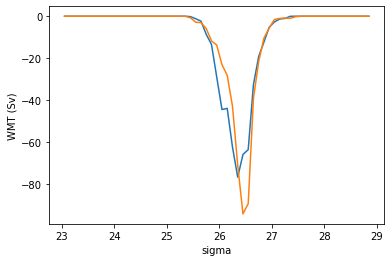

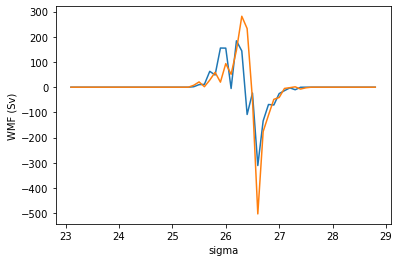

In [17]:
#Plot total transformation - just first timestep to check
f=plt.figure()
plt.plot(wmt1.sigma,wmt1.isel(time=0)/1e6,label=label1)
plt.plot(wmt2.sigma,wmt2.isel(time=0)/1e6,label=label2)
plt.xlabel('sigma')
plt.ylabel('WMT (Sv)')

#formation
f=plt.figure()
plt.plot(wmf1.sigma,wmf1.isel(time=0)/1e6,label=label1)
plt.plot(wmf2.sigma,wmf2.isel(time=0)/1e6,label=label2)
plt.xlabel('sigma')
plt.ylabel('WMF (Sv)')

In [18]:
# Get annual mean WMT values 
wmt1_ann = wmt1.mean(dim="time")
wmf1_ann = wmf1.mean(dim="time")
wmt2_ann = wmt2.mean(dim="time")
wmf2_ann = wmf2.mean(dim="time")

wmt1_fresh_ann = wmt1_fresh.mean(dim="time")
wmf1_fresh_ann = wmf1_fresh.mean(dim="time")
wmt2_fresh_ann = wmt2_fresh.mean(dim="time")
wmf2_fresh_ann = wmf2_fresh.mean(dim="time")

wmt1_heat_ann = wmt1_heat.mean(dim="time")
wmf1_heat_ann = wmf1_heat.mean(dim="time")
wmt2_heat_ann = wmt2_heat.mean(dim="time")
wmf2_heat_ann = wmf2_heat.mean(dim="time")

In [19]:
# calculate differences between two datasets
wmt_ann_diff = wmt1_ann - wmt2_ann
wmf_ann_diff = wmf1_ann - wmf2_ann

wmt_fresh_ann_diff = wmt1_fresh_ann - wmt2_fresh_ann
wmf_fresh_ann_diff = wmf1_fresh_ann - wmf2_fresh_ann

wmt_heat_ann_diff = wmt1_heat_ann - wmt2_heat_ann
wmf_heat_ann_diff = wmf1_heat_ann - wmf2_heat_ann

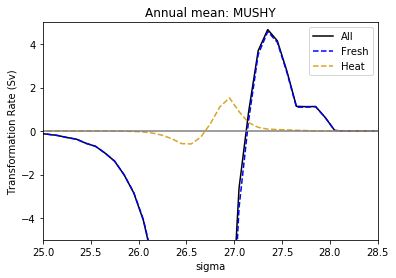

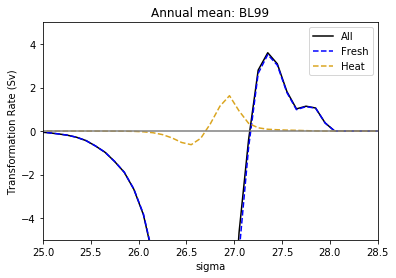

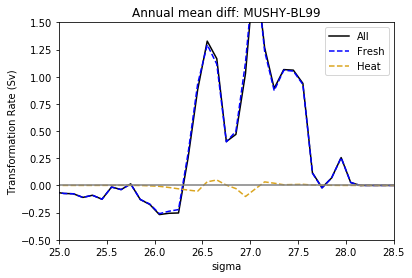

In [23]:
#Plot transformations averaged over all time
f=plt.figure()
plt.plot(wmt1_ann.sigma,wmt1_ann/1e6,label="All",color='black')
plt.plot(wmt1_fresh_ann.sigma,wmt1_fresh_ann/1e6,label="Fresh",color='blue',linestyle='--')
plt.plot(wmt1_heat_ann.sigma,wmt1_heat_ann/1e6,label="Heat",color='goldenrod',linestyle='--')
plt.title('Annual mean: '+label1)
plt.xlabel('sigma')
plt.xlim([25,28.5])
plt.ylabel('Transformation Rate (Sv)')
plt.ylim([-5,5])
#plt.ylim([-20,5])
plt.axhline(y=0.0, color='grey', linestyle='-')
plt.legend()
plt.savefig(label1+'_socn_WMT.png', bbox_inches='tight', dpi=200)

f=plt.figure()
plt.plot(wmt2_ann.sigma,wmt2_ann/1e6,label="All",color='black')
plt.plot(wmt2_fresh_ann.sigma,wmt2_fresh_ann/1e6,label="Fresh",color='blue',linestyle='--')
plt.plot(wmt2_heat_ann.sigma,wmt2_heat_ann/1e6,label="Heat",color='goldenrod',linestyle='--')
plt.title('Annual mean: '+label2)
plt.xlabel('sigma')
plt.xlim([25,28.5])
plt.ylabel('Transformation Rate (Sv)')
plt.ylim([-5,5])
#plt.ylim([-20,5])
plt.axhline(y=0.0, color='grey', linestyle='-')
plt.legend()
plt.savefig(label2+'_socn_WMT.png', bbox_inches='tight', dpi=200)

#Plot difference in transformation averaged over all time
f=plt.figure()
plt.plot(wmt_ann_diff.sigma,wmt_ann_diff/1e6,label="All",color='black')
plt.plot(wmt_fresh_ann_diff.sigma,wmt_fresh_ann_diff/1e6,label="Fresh",color='blue',linestyle='--')
plt.plot(wmt_heat_ann_diff.sigma,wmt_heat_ann_diff/1e6,label="Heat",color='goldenrod',linestyle='--')
plt.title('Annual mean diff: '+label1+'-'+label2)
plt.xlabel('sigma')
plt.xlim([25,28.5])
plt.ylabel('Transformation Rate (Sv)')
plt.ylim([-0.5,1.5])
#plt.ylim([-1,3])
plt.axhline(y=0.0, color='grey', linestyle='-')
plt.legend()
plt.savefig(label1+'_minus_'+label2+'_socn_WMT.png', bbox_inches='tight', dpi=200)

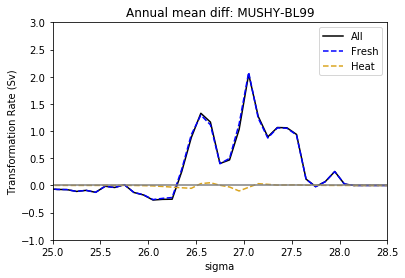

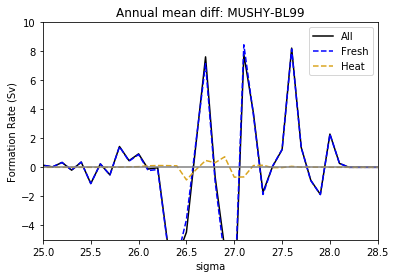

In [21]:
#Plot difference in transformation and formation averaged over all time
f=plt.figure()
plt.plot(wmt_ann_diff.sigma,wmt_ann_diff/1e6,label="All",color='black')
plt.plot(wmt_fresh_ann_diff.sigma,wmt_fresh_ann_diff/1e6,label="Fresh",color='blue',linestyle='--')
plt.plot(wmt_heat_ann_diff.sigma,wmt_heat_ann_diff/1e6,label="Heat",color='goldenrod',linestyle='--')
plt.title('Annual mean diff: '+label1+'-'+label2)
plt.xlabel('sigma')
plt.xlim([25,28.5])
plt.ylabel('Transformation Rate (Sv)')
plt.ylim([-1,3])
plt.axhline(y=0.0, color='grey', linestyle='-')
plt.legend()

f=plt.figure()
plt.plot(wmf_ann_diff.sigma,wmf_ann_diff/1e6,label="All",color='black')
plt.plot(wmf_fresh_ann_diff.sigma,wmf_fresh_ann_diff/1e6,label="Fresh",color='blue',linestyle='--')
plt.plot(wmf_heat_ann_diff.sigma,wmf_heat_ann_diff/1e6,label="Heat",color='goldenrod',linestyle='--')
plt.title('Annual mean diff: '+label1+'-'+label2)
plt.xlabel('sigma')
plt.xlim([25,28.5])
plt.ylabel('Formation Rate (Sv)')
plt.ylim([-5,10])
plt.axhline(y=0.0, color='grey', linestyle='-')
plt.legend()

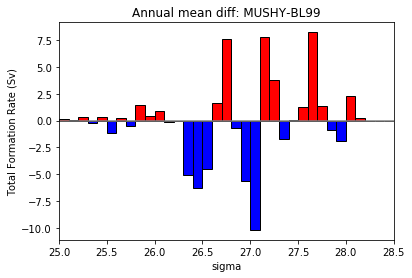

In [24]:
colors = ['red' if (value > 0) else 'blue' for value in wmf_ann_diff]

f=plt.figure()
plt.bar(wmf_ann_diff.sigma,wmf_ann_diff/1e6,align='edge',edgecolor='black',color=colors,width=0.1)
plt.title('Annual mean diff: '+label1+'-'+label2)
plt.xlabel('sigma')
plt.xlim([25,28.5])
plt.ylabel('Total Formation Rate (Sv)')
plt.axhline(y=0.0, color='grey', linestyle='-')
#plt.axvline(x=28.2, color='grey', linestyle='-')
plt.savefig(label1+'_minus_'+label2+'_socn_WMF.png', bbox_inches='tight', dpi=200)

To calculate the WMT due to any other process, read in any diag that contributes a freshwater flux, heat flux, or salt flux. Freshwater fluxes get treated the same as SFWF, while heat fluxes get treated the same as SHF. Salt fluxes do not need to be scaled by S/(1-S) like FW fluxes do, but they do need to be multiplied by beta to turn them into density fluxes. It should be possible to fully decompose SHF and SFWF into different contributors.  